# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.express as px

### Importing the training set

In [2]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [4]:
X_train = []
y_train = []
for i in range (60, 1258):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [5]:
records = X_train.shape[0]
columns = X_train.shape[1]
X_train = np.reshape(X_train, (records, columns, 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [7]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [8]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [12]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [13]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

### Fitting the RNN to the Training set

In [14]:
regressor.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
38/38 [==============================] - 13s 112ms/step - loss: 0.0460
Epoch 2/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0069
Epoch 3/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0059
Epoch 4/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0059
Epoch 5/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0060
Epoch 6/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0045
Epoch 7/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0047
Epoch 9/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0049
Epoch 10/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0047
Epoch 11/100
38/38 [==============================] - 5s 137ms/step - loss: 0.0050
Epoch 12/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0040
Epoch 13/100

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [15]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [16]:
#Concatenation of Training and Test Set
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[(len(dataset_total) - len(dataset_test))-60:].values
inputs = inputs.reshape(-1,1)
#Scaling of Concatenation
inputs = sc.transform(inputs)
#Creating a Structure for Neural Network Input
X_test = []
for i in range (60, 80):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#Restructuring it into 3D
records = X_test.shape[0]
columns = X_test.shape[1]
X_test = np.reshape(X_test, (records, columns, 1))
#PREDICT
predicted_stock_price = regressor.predict(X_test)
#Inverse Scaling of Predictions
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


### Visualising the results

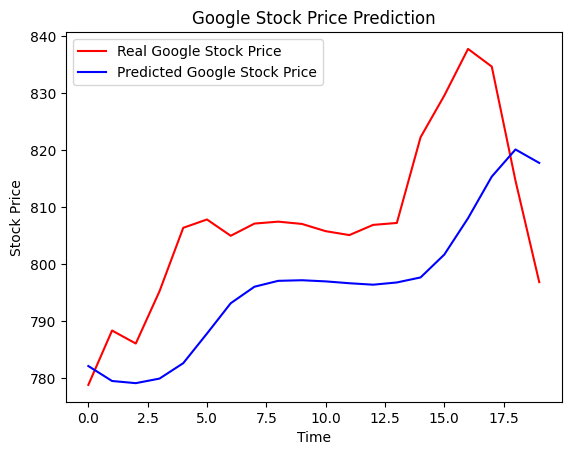

In [22]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label="Predicted Google Stock Price")
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()